<a href="https://colab.research.google.com/github/deepanshu301999/DeepanshuChaudhary-ML-Project/blob/master/EDA_Car_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of Car Features

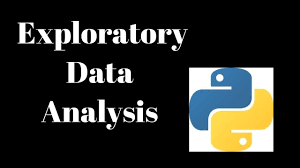

**Objective**

The objective of the project is to do data pre-processing and exploratory data analysis of the dataset Car Features.

In this project, Exploratory data analysis is performed on how the different features of a car and its price are related. The dataset describes almost 12,000 car models, sold in the USA between 1990 and 2017, with the market price(new or used) and some features.

Exploratory Data Analysis:-

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. 

The Data Description is as follows-
Make(Car Make), Model(Car Model), Year(Car Year(Marketing)), Engine Fuel Type, Engine HP(Engine HorsePower(HP)), Engine Cylinders,Transmission Type, Driven_Wheels, Number of Doors, Market Category, Vehicle Size, Vehicle Style(Type), highway MPG, city mpg, Popularit,(Twitter), MSRP(Manufacturer Suggested Retail Price).

The Project is described in step by step manner below-:

# Step1
Importing the dataset and the necessary libraries, checking datatype, statistical summary, shape, null values etc.

# 1.1 Importing the required libraries and dataset

In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Importing the dataset.
df=pd.read_csv('data.csv')

# 1.2 Checking the dataset and datatype

We randomly see the first five and last five rows.

In [3]:
# To display the top 5 rows
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
# To display the bottom 5 rows
df.tail(5) 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format so nothing to worry.

In [7]:
# Checking the data type
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

# 1.3 Checking Statistical summary, shape, null values

These are some statistics of the dataset which tell us the information of data.

In [9]:
#statistical summary of various columns of dataset
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [10]:
# Total number of rows and columns(shape)
df.shape

(11914, 16)

Now we check for the Null Values inside dataset


In [11]:
# Finding the null values.
print(df.isnull().sum())

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [12]:
#finding null value of a specific column
df["Market Category"].isnull().sum()

3742

# Step 2
Check columns in the  dataset which is of less relevance and drop them.

# 2.1 Checking Data of less Relevance

In Above Step 1.2 we see that column['No of Doors'] is not changing very frequently.
And also the column['Market Category'] is of no use.
so column[ 'No of Doors' , 'Market Category' ] are of less relevance.

# 2.2 Dropping irrelevant Columns

In [ ]:
# Dropping irrelevant columns
df=df.drop(['Market Category','Number of Doors'],axis=1)

In [27]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [16]:
#Checking size
df.shape

(11914, 14)

In [17]:
#after dropping
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Vehicle Size', 'Vehicle Style', 'highway MPG', 'city mpg',
       'Popularity', 'MSRP'],
      dtype='object')

# Step3
Rename the columns for improving readability of the dataset

In this dataset, most of the column names are very confusing and complex to read, so I just renamed them.

In [31]:
#renaming the column names
df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission",
                    "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"},inplace=True)
df.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              11914 non-null  object 
 1   Model             11914 non-null  object 
 2   Year              11914 non-null  int64  
 3   Engine Fuel Type  11911 non-null  object 
 4   HP                11845 non-null  float64
 5   Cylinders         11884 non-null  float64
 6   Transmission      11914 non-null  object 
 7   Drive Mode        11914 non-null  object 
 8   Vehicle Size      11914 non-null  object 
 9   Vehicle Style     11914 non-null  object 
 10  MPG-H             11914 non-null  int64  
 11  MPG-C             11914 non-null  int64  
 12  Popularity        11914 non-null  int64  
 13  Price             11914 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 1.3+ MB


# Step 4
Check for any duplicates in the data, check for null values and missing data and remove
them

# 4.1 Checking duplicates and Removing them

In [33]:
#find total duplicates in dataset
df.duplicated().sum()

721

In [36]:
# Used to count the number of rows before removing the data
df.count() 

Make                10571
Model               10571
Year                10571
Engine Fuel Type    10568
HP                  10502
Cylinders           10541
Transmission        10571
Drive Mode          10571
Vehicle Size        10571
Vehicle Style       10571
MPG-H               10571
MPG-C               10571
Popularity          10571
Price               10571
dtype: int64

In [37]:
#remove all duplicates
df.drop_duplicates(keep=False,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10571 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              10571 non-null  object 
 1   Model             10571 non-null  object 
 2   Year              10571 non-null  int64  
 3   Engine Fuel Type  10568 non-null  object 
 4   HP                10502 non-null  float64
 5   Cylinders         10541 non-null  float64
 6   Transmission      10571 non-null  object 
 7   Drive Mode        10571 non-null  object 
 8   Vehicle Size      10571 non-null  object 
 9   Vehicle Style     10571 non-null  object 
 10  MPG-H             10571 non-null  int64  
 11  MPG-C             10571 non-null  int64  
 12  Popularity        10571 non-null  int64  
 13  Price             10571 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 1.2+ MB


In [38]:
# Counting the number of rows after removing duplicates.
df.count()

Make                10571
Model               10571
Year                10571
Engine Fuel Type    10568
HP                  10502
Cylinders           10541
Transmission        10571
Drive Mode          10571
Vehicle Size        10571
Vehicle Style       10571
MPG-H               10571
MPG-C               10571
Popularity          10571
Price               10571
dtype: int64

# 4.2 Checking null value and removing them

In [39]:
#find null values in data and remove them
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10470 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              10470 non-null  object 
 1   Model             10470 non-null  object 
 2   Year              10470 non-null  int64  
 3   Engine Fuel Type  10470 non-null  object 
 4   HP                10470 non-null  float64
 5   Cylinders         10470 non-null  float64
 6   Transmission      10470 non-null  object 
 7   Drive Mode        10470 non-null  object 
 8   Vehicle Size      10470 non-null  object 
 9   Vehicle Style     10470 non-null  object 
 10  MPG-H             10470 non-null  int64  
 11  MPG-C             10470 non-null  int64  
 12  Popularity        10470 non-null  int64  
 13  Price             10470 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 1.2+ MB


In [41]:
#null values in data set
df.isnull().sum()

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64

# 4.3 Checking missing value and removing them

In [42]:
# Dropping the missing values.
df = df.dropna() 
df.count()# Dropping the missing values.
df = df.dropna() 
df.count()

Make                10470
Model               10470
Year                10470
Engine Fuel Type    10470
HP                  10470
Cylinders           10470
Transmission        10470
Drive Mode          10470
Vehicle Size        10470
Vehicle Style       10470
MPG-H               10470
MPG-C               10470
Popularity          10470
Price               10470
dtype: int64

In [43]:
# After dropping the values
print(df.isnull().sum())

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64


# Step 5
Plotting graphs of various columns to check for outliers and remove those data points from the
dataset.


# 5.1 Boxplot graph for various columns

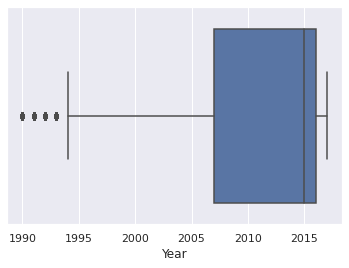

In [46]:
#Boxplot of different columns
sns.boxplot(x=df["Year"])

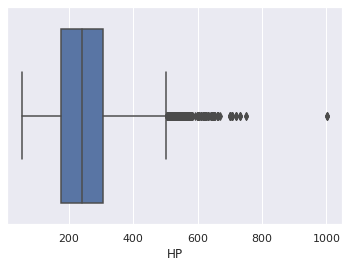

In [47]:
sns.boxplot(x=df["HP"])

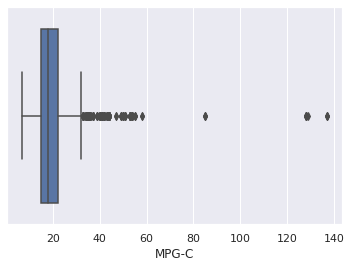

In [48]:
sns.boxplot(x=df["MPG-C"])

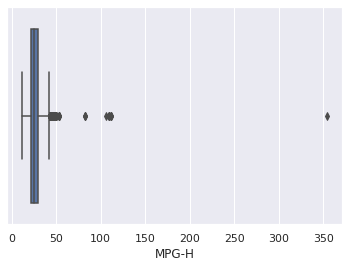

In [49]:
sns.boxplot(x=df["MPG-H"])

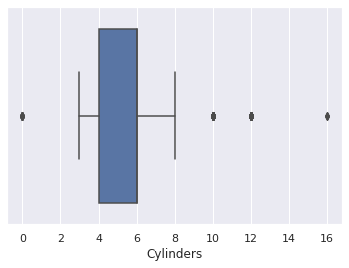

In [50]:
sns.boxplot(x=df["Cylinders"])

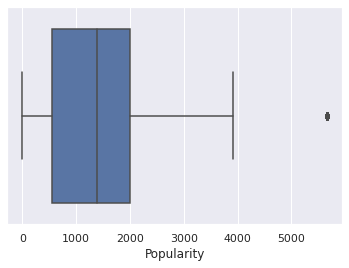

In [51]:
sns.boxplot(x=df["Popularity"])

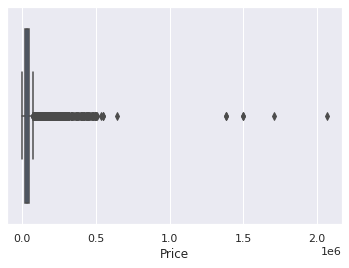

In [52]:
sns.boxplot(x=df["Price"])

# 5.2 Removing Outliers shown in above graph

In [53]:
#Remove all outliers in the boxplot
Q1=df.quantile(0.25)
Q2=df.quantile(0.75)
IQR=Q2-Q1
print(IQR)

Year              9.0
HP              131.0
Cylinders         2.0
MPG-H             8.0
MPG-C             7.0
Popularity     1460.0
Price         21822.5
dtype: float64


In [54]:
#Check number of outliers in boxplot of different columns before removing them
( (df<(Q1-(1.5*IQR))) | (df>(Q2+(1.5*IQR))) ).sum()

Cylinders           304
Drive Mode            0
Engine Fuel Type      0
HP                  478
MPG-C               217
MPG-H               119
Make                  0
Model                 0
Popularity          765
Price               916
Transmission          0
Vehicle Size          0
Vehicle Style         0
Year                343
dtype: int64

In [58]:
df=df[~( (df<(Q1-(1.5*IQR))) | (df>(Q2+(1.5*IQR))) ).any(axis=1)]

# 5.3 Boxplot after removing outlier

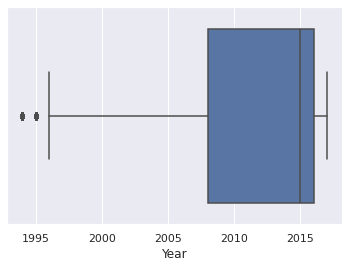

In [59]:
sns.boxplot(x=df["Year"])

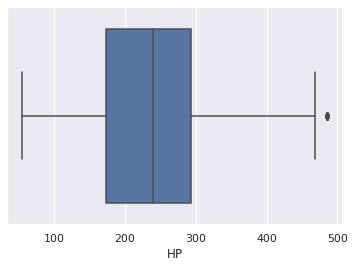

In [60]:
sns.boxplot(x=df["HP"])

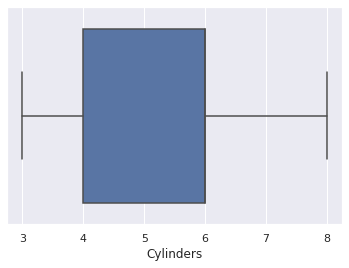

In [61]:
sns.boxplot(x=df["Cylinders"])

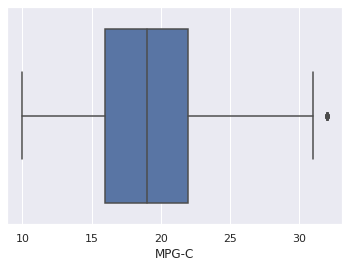

In [62]:
sns.boxplot(x=df["MPG-C"])

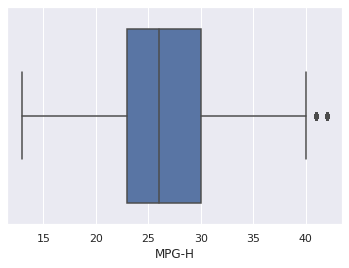

In [63]:
sns.boxplot(x=df["MPG-H"])

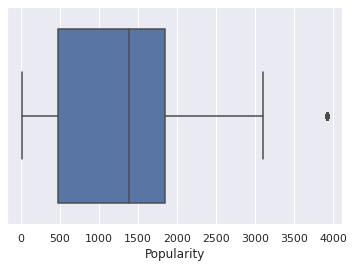

In [64]:
sns.boxplot(x=df["Popularity"])

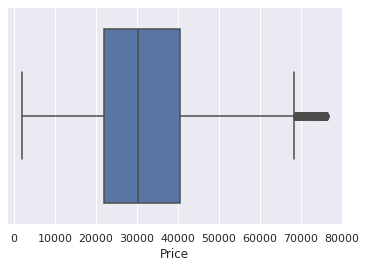

In [65]:
sns.boxplot(x=df["Price"])

In [66]:
#Check outliers in boxplot of different columns after removing them
( (df<(Q1-(1.5*IQR))) | (df>(Q2+(1.5*IQR))) ).sum()

Cylinders           0
Drive Mode          0
Engine Fuel Type    0
HP                  0
MPG-C               0
MPG-H               0
Make                0
Model               0
Popularity          0
Price               0
Transmission        0
Vehicle Size        0
Vehicle Style       0
Year                0
dtype: int64

# Step 6
What car brands are the most represented in the dataset and finding the average price among the top car brands.


# 6.1 Finding most represented car brands

In [74]:
import plotly.graph_objects as go
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

popular_labels = counts.index[:10]


colors = ['blue',] * len(popular_labels)
colors[0] = 'red'

fig = go.Figure(data=[go.Bar(
    x=counts[:10],
    y=popular_labels,
    marker_color=colors, 
    orientation='h'
)])

fig.update_layout(title_text='Top 10 Car Brands in America (in %)',
                  xaxis_title="Percentage",
                  yaxis_title="Car Brand")

# 6.2 Finding avg. price of top car brands

In [75]:
#Average price among the top 10 car brands
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28546.168327
Dodge       26178.358722
GMC         33666.516199
Honda       27038.467018
Mazda       20628.445040
Nissan      28559.636542
Toyota      28759.360000
Volkswagen  30449.461017


In [77]:
#Graph of Average price among the top 10 car brands
index = df.groupby(['Year']).mean()['Price'].index.tolist()
mean_prices = df.groupby(['Year']).mean()['Price'].values.tolist()
std_prices = df.groupby(['Year']).std()['Price'].values.tolist()


price_per_year = pd.DataFrame(np.column_stack((mean_prices, std_prices)), columns=['Mean', 'Std'], index=index)


fig = go.Figure()

fig.add_trace(go.Scatter(x=index, y=price_per_year.Mean,
                    mode='markers',
                    name='Mean Price'))

fig.add_trace(go.Scatter(x=index, y=price_per_year.Std,
                    mode='markers',
                    name='Std Price'))

fig.update_layout(title="Average Price per Year",
                  xaxis_title="Year",
                  yaxis_title="Price")

fig.show()

# Step 7
Plotting the correlation matrix and documenting the insights

# 7.1 Plotting the Correlation matrix

In [78]:
#Correlation matrix
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.329259,-0.085730,0.357681,0.319505,0.208509,0.579331
HP,0.329259,1.000000,0.745470,-0.464840,-0.564341,0.099750,0.746944
Cylinders,-0.085730,0.745470,1.000000,-0.690858,-0.744093,0.019341,0.405795
MPG-H,0.357681,-0.464840,-0.690858,1.000000,0.937103,0.095116,-0.134963
MPG-C,0.319505,-0.564341,-0.744093,0.937103,1.000000,0.084180,-0.211754
Popularity,0.208509,0.099750,0.019341,0.095116,0.084180,1.000000,0.114641
Price,0.579331,0.746944,0.405795,-0.134963,-0.211754,0.114641,1.000000


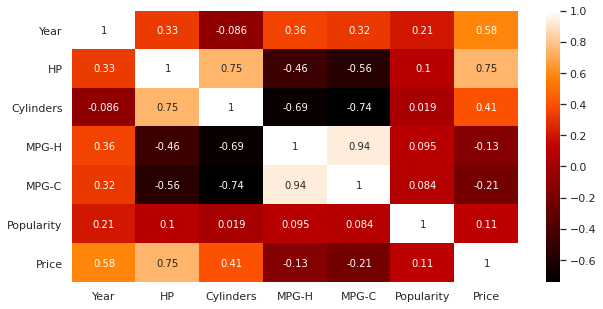

In [82]:
#Plot heatmap for different columns

plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap(c, cmap=plt.cm.gist_heat, annot=True )

# Documentation Insights

From the above correlation matrix we see that-:

1) We conclude that HP and Cylinders both are correlated positively with each other

2) Price is correlated with Year and HP positively

3) MPG-C and MPG-H both have very less correlation in each other

4) MPG-C and MPG-H both have strong negative correlation with Cylinders

5) Popularity is not correlated with anything

# Step 8
Performing EDA and plotting different graphs and document the findings

# 8.1 plotting Graph of various column with price

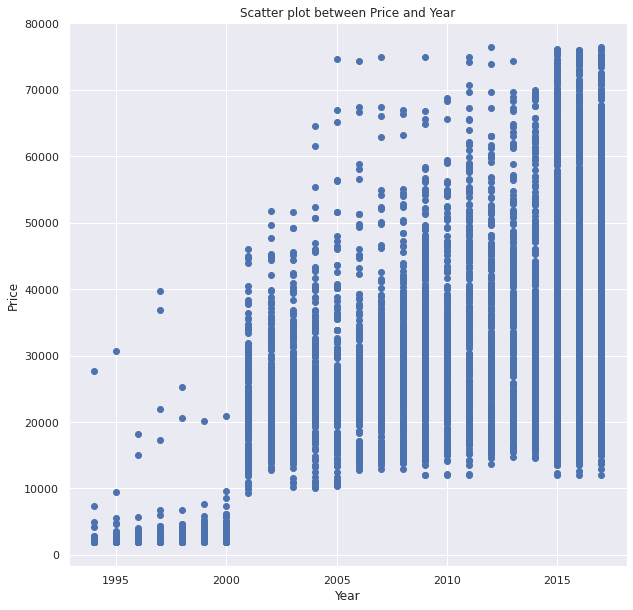

In [84]:
#Graph between Price and Year
fig, axis=plt.subplots(figsize=(10,10))
axis.scatter(df["Year"], df["Price"])
plt.title("Scatter plot between Price and Year")
axis.set_xlabel("Year")
axis.set_ylabel("Price")
plt.show()

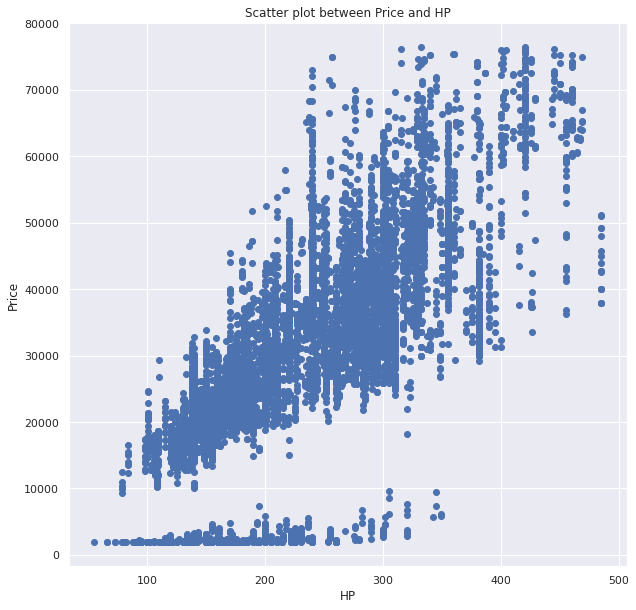

In [90]:
#Graph between Price and HP
fig, axis=plt.subplots(figsize=(10,10))
axis.scatter(df["HP"], df["Price"])
plt.title("Scatter plot between Price and HP")
axis.set_xlabel("HP")
axis.set_ylabel("Price")
plt.show()

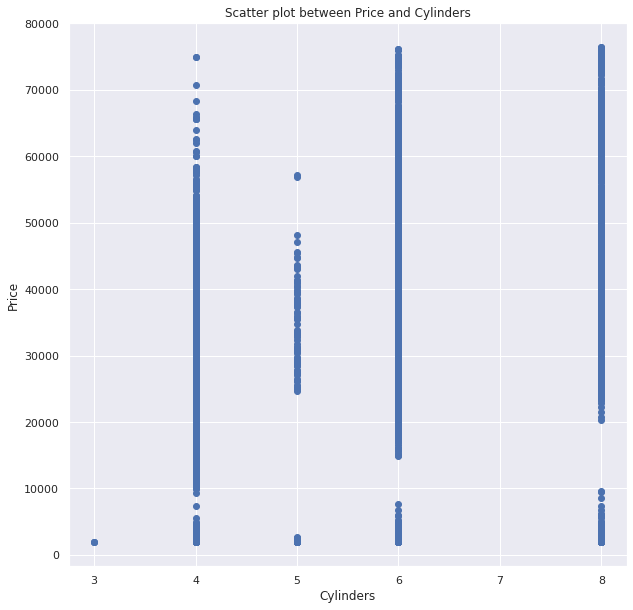

In [95]:
#Graph between Price and  Cylinders
fig, axis=plt.subplots(figsize=(10,10))
axis.scatter(df["Cylinders"], df["Price"])
plt.title("Scatter plot between Price and Cylinders")
axis.set_xlabel("Cylinders")
axis.set_ylabel("Price")
plt.show()

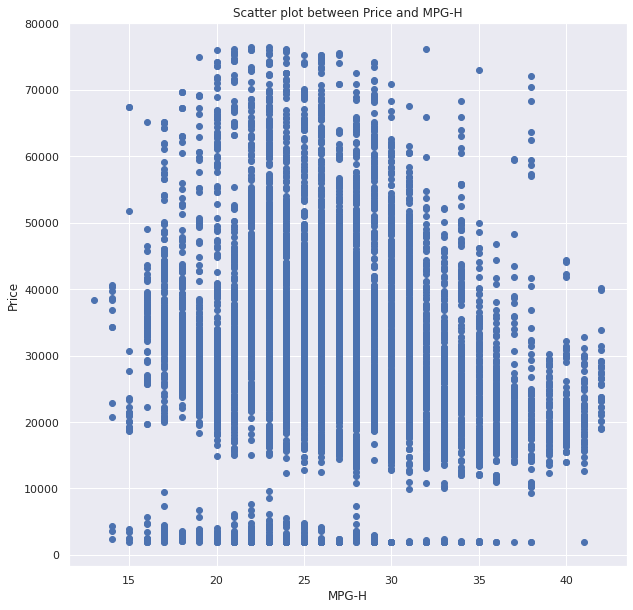

In [92]:
#Graph between Price and MPG-H
fig, axis=plt.subplots(figsize=(10,10))
axis.scatter(df["MPG-H"], df["Price"])
plt.title("Scatter plot between Price and MPG-H")
axis.set_xlabel("MPG-H")
axis.set_ylabel("Price")
plt.show()

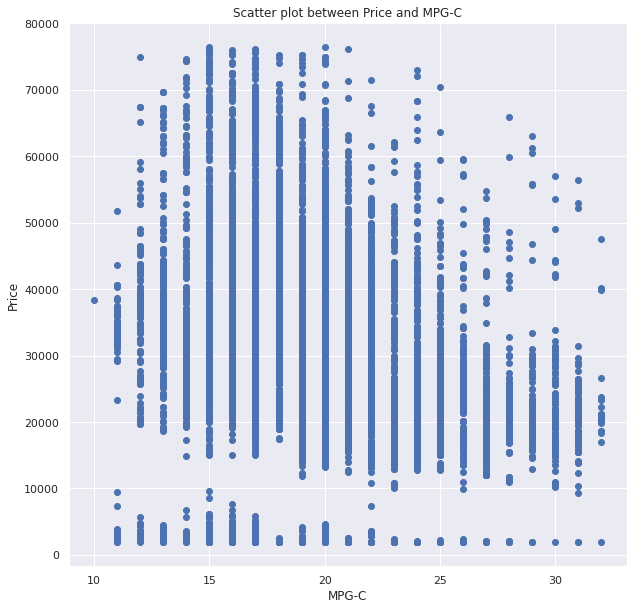

In [93]:
#Graph between Price and MPG-C
fig, axis=plt.subplots(figsize=(10,10))
axis.scatter(df["MPG-C"], df["Price"])
plt.title("Scatter plot between Price and MPG-C")
axis.set_xlabel("MPG-C")
axis.set_ylabel("Price")
plt.show()

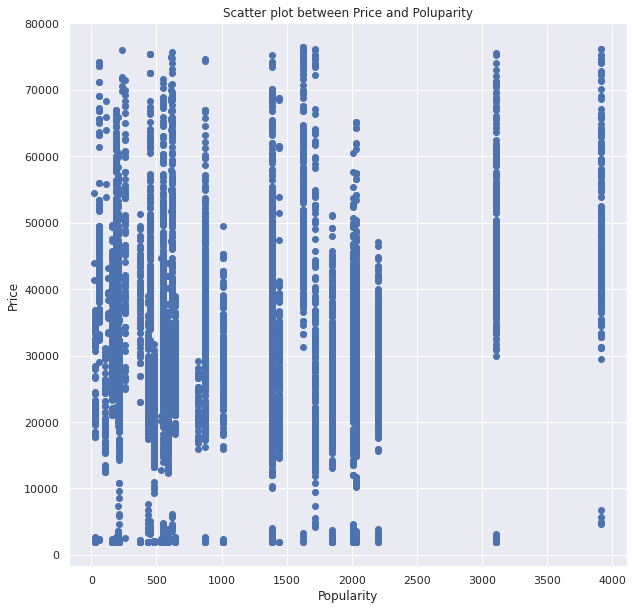

In [94]:
#Graph between Price and Popularity
fig, axis=plt.subplots(figsize=(10,10))
axis.scatter(df["Popularity"], df["Price"])
plt.title("Scatter plot between Price and Poluparity")
axis.set_xlabel("Popularity")
axis.set_ylabel("Price")
plt.show()

# Documentation Findings

After plotting graph between Year and Price we conclude that:-

As Year increase Price also increase

As value of HP increase Price will also increase

Price will decrease with the value of MPG-H and MPG-C

Popularity is not affecting the Price

# Step 9
Splitting the dataset into 75 and 25 ratio and building a machine learning model with Price as the target variable.

# 9.1 Splitting the dataset for training and testing

In [98]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [99]:
x = df[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values #independent variable
y = df['Price'].values #dependent variable

In [100]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y.reshape(-1,1))

In [102]:
#Splitting the dataset into the training set and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

# 9.2 Building ML Model:LinearRegression

In [103]:
#Fitting multiple linear regression to the training set
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

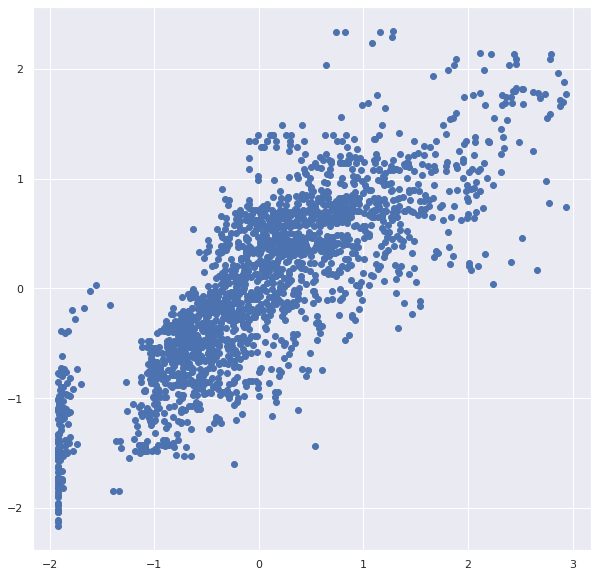

In [104]:
#Predicting the test set results
y_pred = regressor.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred)

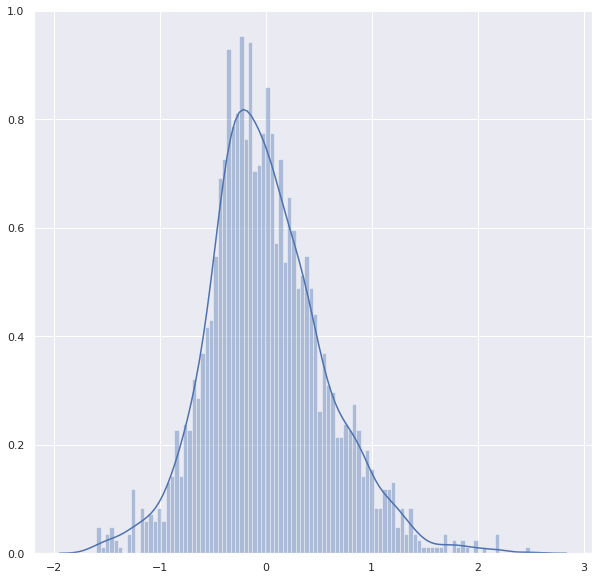

In [106]:
plt.figure(figsize=(10,10))
sns.distplot((y_test-y_pred),bins=100)

In [108]:
#Finding the value of MAE, RMSE and R-Square
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.42672578412126283
Root Mean Squared Error: 0.5538037917381192
R2 Score: 0.6785482625982548


# Step 10
Trying different algorithms and checking their performance over metrics like R_square, RMSE, MAE etc and document your findings

# 10.1 Polynomial Regression

In [109]:
#Input polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(x_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

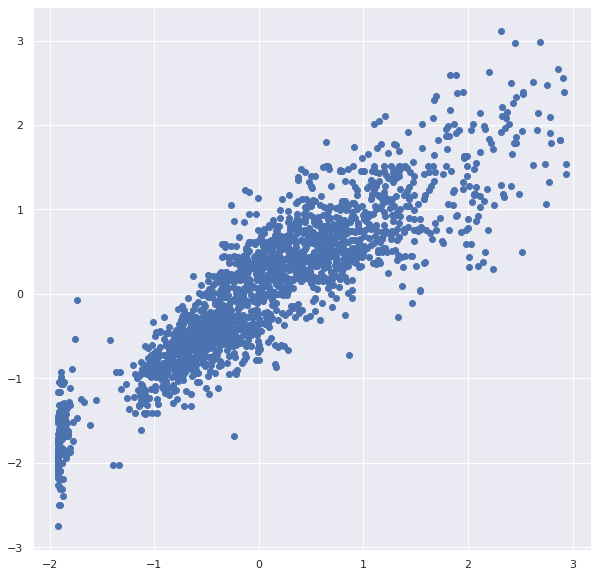

In [110]:
#Predicting a new result using polynomial regression
y_pred=lin_reg_2.predict(poly_reg.fit_transform(x_test))
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred)

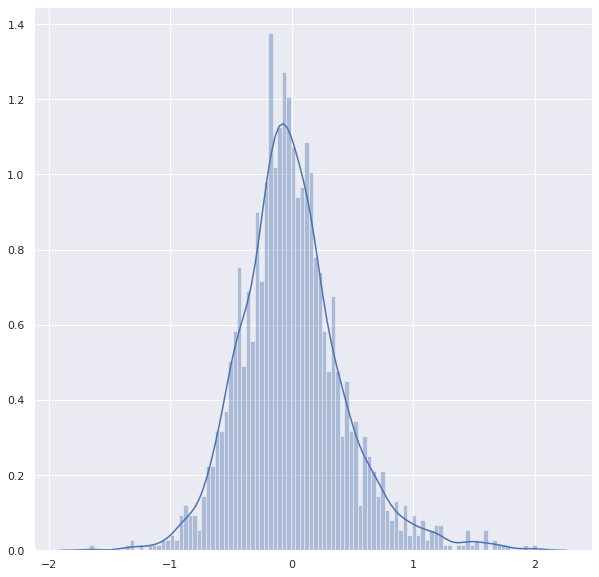

In [112]:
plt.figure(figsize=(10,10))
sns.distplot((y_test-y_pred),bins=100)

In [114]:
#Finding the value of MAE, RMSE and R-Square
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.3187818810840435
Root Mean Squared Error: 0.42669298112205484
R2 Score: 0.8091751517974815


# 10.2 Support Vector Machine

In [115]:
#Insert SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

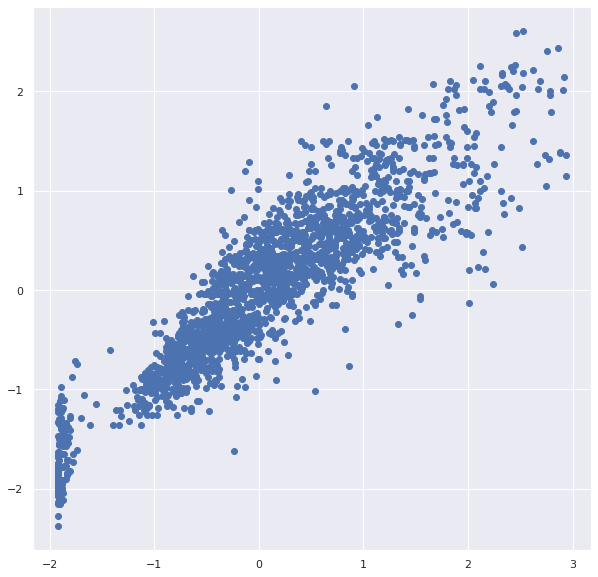

In [116]:
#Predicting a new result using SVR
y_pred = regressor.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred)

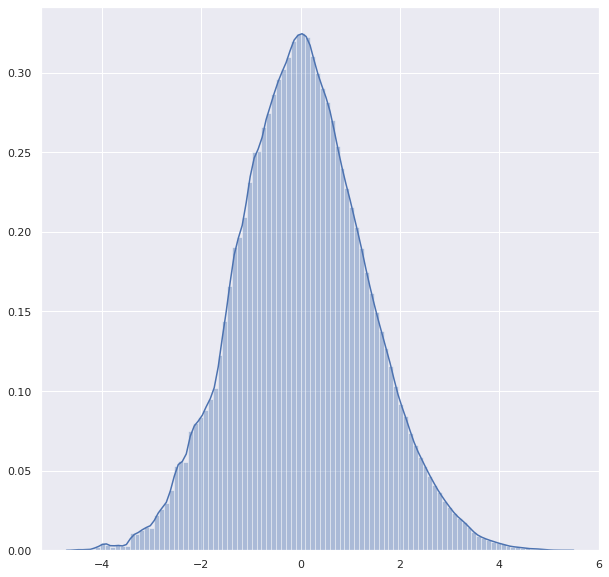

In [117]:
plt.figure(figsize=(10,10))
sns.distplot((y_test-y_pred),bins=100)

In [119]:
#Find value MAE, RMSE and R-Square using SVR
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.3041942030626726
Root Mean Squared Error: 0.4264656506365493
R2 Score: 0.8093784302734826


# 10.3 Random Forest

In [120]:
#Input Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

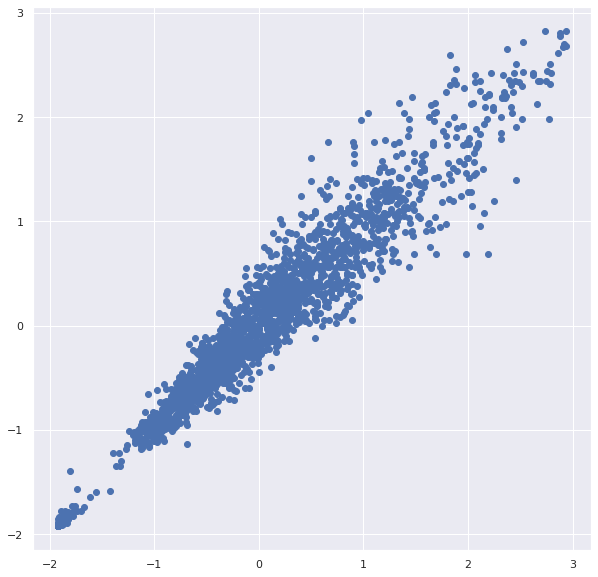

In [122]:
#Predict result using Random Forest Regression
y_pred = regressor.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred)

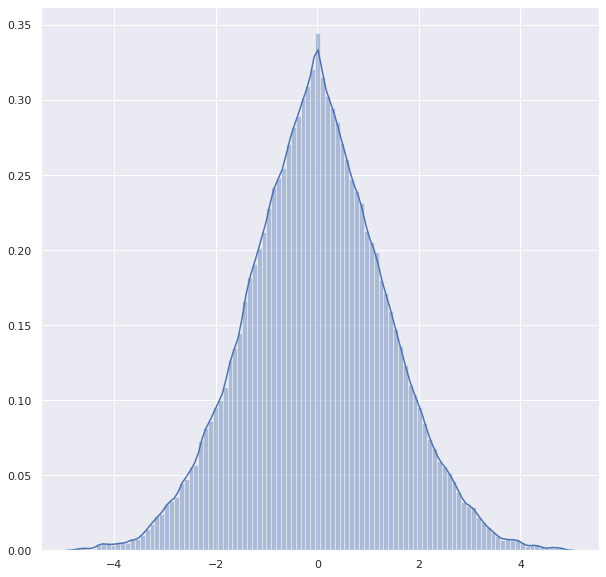

In [123]:
plt.figure(figsize=(10,10))
sns.distplot((y_test-y_pred),bins=100)

In [124]:
#Find values of MAE, RMSE and R-Square for Random Forest Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.18408317521281137
Root Mean Squared Error: 0.25687304585334214
R2 Score: 0.9308422272364935
